In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gdp_df = pd.read_csv("Data/gdp_percapita.csv", nrows = 6500)

In [197]:
internet_df = pd.read_csv("./Data/internet_use.csv", nrows = 4495)

In [210]:
homicide_df = pd.read_csv("./Data/Intentional homicide victims^J total counts and rat.xls.csv", encoding = "ISO-8859-1", nrows = 235)

In [217]:
homicide_yearly = homicide_df.loc[homicide_df.Year.isin(["2004", '2009', '2014'])]

AttributeError: 'DataFrame' object has no attribute 'Year'

In [216]:
pd.merge(gdp_df, homicide_df, left_on = "Country", right_on = "UNODC Name", how = "outer" )

,Country,Year,GDP_Per_Capita,Region,Subregion,UNODC Name,Source,2000,2001,2002,...,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1
0,Afghanistan,2017.0,1758.465636,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
1,Afghanistan,2016.0,1757.023490,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
2,Afghanistan,2015.0,1766.593077,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
3,Afghanistan,2014.0,1795.735834,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
4,Afghanistan,2013.0,1807.762344,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
5,Afghanistan,2012.0,1772.764974,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
6,Afghanistan,2011.0,1626.764793,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
7,Afghanistan,2010.0,1671.581238,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
8,Afghanistan,2009.0,1502.354073,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN
9,Afghanistan,2008.0,1267.644939,Asia,Southern Asia,Afghanistan,NSO,NaN,NaN,NaN,...,NaN,NaN,4,3.4,4.1,6.3,NaN,NaN,NaN,NaN


In [4]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [5]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN


In [6]:
gdp_df.shape

(6500, 4)

In [7]:
internet_df.shape

(4495, 4)

In [8]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6490,Zimbabwe,1999,3054.064189,NaN
6491,Zimbabwe,1998,3099.076182,NaN
6492,Zimbabwe,1997,3036.422224,NaN
6493,Zimbabwe,1996,2985.856605,NaN
6494,Zimbabwe,1995,2736.486436,NaN
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


In [10]:
internet_df = internet_df.drop("Value Footnotes", axis = 1)

In [11]:
gdp_df = gdp_df.drop("Value Footnotes", axis = 1)

In [12]:
internet_df.head(3)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545


In [13]:
gdp_df.head(3)

,Country or Area,Year,Value
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077


In [14]:
internet_df = internet_df.rename(columns={"Country or Area" : "Country", "Value" : "Internet_Users_Pct"})
internet_df.head(3)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545


In [15]:
gdp_df = gdp_df.rename(columns={"Country or Area" : "Country", "Value" : "GDP_Per_Capita"})

In [16]:
gdp_df.head(3)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077


In [17]:
gdp_and_internet_usage = pd.concat([gdp_df, internet_df], axis = 1)

In [26]:
joined_match_gdp = pd.merge(gdp_df, internet_df, on = ["Country", "Year"], how = "inner")

In [27]:
joined_concat_gdp = pd.concat([gdp_df, internet_df], axis = 1)

In [28]:
joined_concat_gdp.head()

,Country,Year,GDP_Per_Capita,Country,Year,Internet_Users_Pct
0,Afghanistan,2017,1758.465636,Afghanistan,2014.0,6.390000
1,Afghanistan,2016,1757.023490,Afghanistan,2013.0,5.900000
2,Afghanistan,2015,1766.593077,Afghanistan,2012.0,5.454545
3,Afghanistan,2014,1795.735834,Afghanistan,2011.0,5.000000
4,Afghanistan,2013,1807.762344,Afghanistan,2010.0,4.000000


In [29]:
joined_concat_gdp.tail()

,Country,Year,GDP_Per_Capita,Country,Year,Internet_Users_Pct
6495,Zimbabwe,1994,2768.309953,NaN,NaN,NaN
6496,Zimbabwe,1993,2572.870395,NaN,NaN,NaN
6497,Zimbabwe,1992,2591.007534,NaN,NaN,NaN
6498,Zimbabwe,1991,2906.272849,NaN,NaN,NaN
6499,Zimbabwe,1990,2819.549467,NaN,NaN,NaN


In [30]:
joined_match_gdp.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2013,1807.762344,5.900000
2,Afghanistan,2012,1772.764974,5.454545
3,Afghanistan,2011,1626.764793,5.000000
4,Afghanistan,2010,1671.581238,4.000000


In [31]:
joined_match_gdp.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,0.033080
3515,Zimbabwe,1996,2985.856605,0.016790
3516,Zimbabwe,1995,2736.486436,0.007684
3517,Zimbabwe,1994,2768.309953,0.001739
3518,Zimbabwe,1990,2819.549467,0.000000


In [59]:
loc_gdp = joined_match_gdp.loc[joined_match_gdp.Year.isin(["2004", '2009', '2014'])]

In [188]:
loc_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
5,Afghanistan,2009,1502.354073,3.550000
10,Afghanistan,2004,1025.208245,0.105809
13,Albania,2014,10700.522802,60.100000
18,Albania,2009,9525.372374,41.200000
23,Albania,2004,7001.054941,2.420388
34,Algeria,2014,13549.025150,18.090000
39,Algeria,2009,12694.745562,11.230000
44,Algeria,2004,11847.319747,4.634475
56,Angola,2014,6813.052106,21.260000


In [60]:
year_2004 = loc_gdp.loc[loc_gdp["Year"] == 2004]

In [63]:
year_2009 = loc_gdp.loc[loc_gdp["Year"] == 2009]

In [64]:
year_2014 = loc_gdp.loc[loc_gdp["Year"] == 2014]

In [97]:
max_internet_usage_2014 = year_2014.loc[year_2014["Internet_Users_Pct"].idxmax()]

In [98]:
min_internet_usage_2014 = year_2014.loc[year_2014["Internet_Users_Pct"].idxmin()]

In [99]:
max_internet_usage_2009 = year_2009.loc[year_2009["Internet_Users_Pct"].idxmax()]

In [100]:
min_internet_usage_2009 = year_2009.loc[year_2009["Internet_Users_Pct"].idxmin()]

In [101]:
max_internet_usage_2004 = year_2004.loc[year_2004["Internet_Users_Pct"].idxmax()]

In [102]:
min_internet_usage_2004 = year_2004.loc[year_2004["Internet_Users_Pct"].idxmin()]

In [103]:
print(max_internet_usage_2014)

Country               Iceland
Year                     2014
GDP_Per_Capita        42774.9
Internet_Users_Pct      98.16
Name: 1395, dtype: object


In [104]:
print(min_internet_usage_2014)

Country               Timor-Leste
Year                         2014
GDP_Per_Capita            6466.74
Internet_Users_Pct           1.14
Name: 3104, dtype: object


In [105]:
print(max_internet_usage_2009)

Country               Iceland
Year                     2009
GDP_Per_Capita        41505.1
Internet_Users_Pct         93
Name: 1400, dtype: object


In [106]:
print(min_internet_usage_2009)

Country               Timor-Leste
Year                         2009
GDP_Per_Capita            9275.53
Internet_Users_Pct       0.185252
Name: 3109, dtype: object


In [107]:
print(max_internet_usage_2004)

Country                Sweden
Year                     2004
GDP_Per_Capita        40299.9
Internet_Users_Pct      83.89
Name: 3002, dtype: object


In [108]:
print(min_internet_usage_2004)

Country                 Myanmar
Year                       2004
GDP_Per_Capita          1999.71
Internet_Users_Pct    0.0243374
Name: 2146, dtype: object


In [110]:
max_gdp_2014 = year_2014.loc[year_2014["GDP_Per_Capita"].idxmax()]

In [111]:
min_gdp_2014 = year_2014.loc[year_2014["GDP_Per_Capita"].idxmin()]

In [112]:
print(max_gdp_2014)

Country                Qatar
Year                    2014
GDP_Per_Capita        116694
Internet_Users_Pct     91.49
Name: 2556, dtype: object


In [113]:
print(min_gdp_2014)

Country               Mauritania
Year                        2014
GDP_Per_Capita           377.909
Internet_Users_Pct          10.7
Name: 1983, dtype: object


([<matplotlib.axis.YTick at 0x269078e7828>,
 <a list of 7 Text yticklabel objects>)

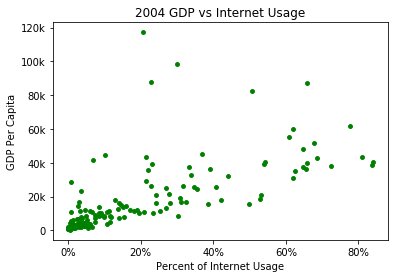

In [143]:
plt.scatter(year_2004["Internet_Users_Pct"], year_2004["GDP_Per_Capita"], color = "Green", s = 15)
plt.ylabel("GDP Per Capita")
plt.xlabel("Percent of Internet Usage")
plt.title("2004 GDP vs Internet Usage")
plt.xticks([0,20,40,60,80], ["0%", "20%", "40%", "60%", "80%"])
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ["0", "20k", "40k", '60k', '80k', '100k', '120k'])

([<matplotlib.axis.YTick at 0x2690789a7f0>,
 <a list of 7 Text yticklabel objects>)

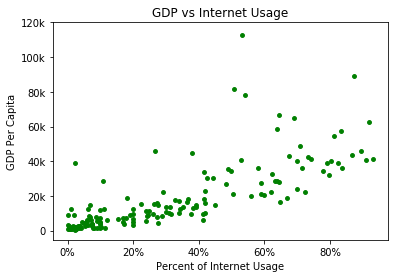

In [142]:
plt.scatter(year_2009["Internet_Users_Pct"], year_2009["GDP_Per_Capita"], color = "Green", s = 15)
plt.ylabel("GDP Per Capita")
plt.xlabel("Percent of Internet Usage")
plt.title("GDP vs Internet Usage")
plt.xticks([0,20,40,60,80], ["0%", "20%", "40%", "60%", "80%"])
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ["0", "20k", "40k", '60k', '80k', '100k', '120k'])

([<matplotlib.axis.YTick at 0x2690784c940>,
 <a list of 7 Text yticklabel objects>)

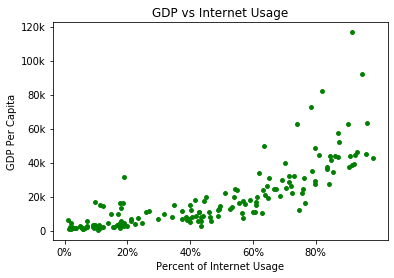

In [141]:
plt.scatter(year_2014["Internet_Users_Pct"], year_2014["GDP_Per_Capita"], color = "Green", s = 15)
plt.ylabel("GDP Per Capita")
plt.xlabel("Percent of Internet Usage")
plt.title("GDP vs Internet Usage")
plt.xticks([0,20,40,60,80], ["0%", "20%", "40%", "60%", "80%"])
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ["0", "20k", "40k", '60k', '80k', '100k', '120k'])

As the years go on, the GDP becomes more and more dependant on internet usage. In 2004 you have a fairly dispersed data-set, where in 2014 everything tightens up and demonstrates the curve. The amount of internet usage directly correlates with the GDP Per Capita

(array([93., 35., 21.,  8.,  4.,  1.,  1.,  1.]),
 array([   377.9089162 ,  14917.35876432,  29456.80861244,  43996.25846056,
         58535.70830868,  73075.1581568 ,  87614.60800492, 102154.05785304,
        116693.50770116]),
 <a list of 8 Patch objects>)

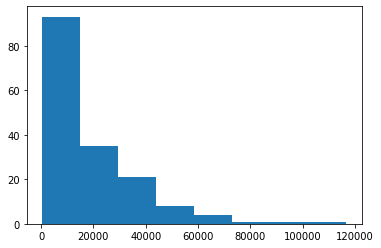

In [156]:
plt.hist(year_2014["GDP_Per_Capita"], bins = 8)

This is unimodal.

(array([34., 25.,  8., 26., 17., 19., 19., 16.]),
 array([ 1.14  , 13.2675, 25.395 , 37.5225, 49.65  , 61.7775, 73.905 ,
        86.0325, 98.16  ]),
 <a list of 8 Patch objects>)

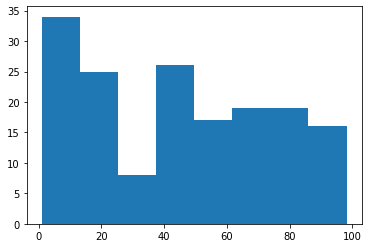

In [155]:
plt.hist(year_2014["Internet_Users_Pct"], bins = 8)

This is not unimodal

In [159]:
Top_Internet_Users = year_2014.sort_values('Internet_Users_Pct', ascending=False)

In [160]:
Top_Internet_Users.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16
2310,Norway,2014,63419.314779,96.30
854,Denmark,2014,45057.074170,95.99
1812,Luxembourg,2014,92349.186486,94.67
2199,Netherlands,2014,46238.209702,93.17


In [172]:
Top_5_Countries = pd.merge(Top_Internet_Users.head(), joined_match_gdp, on = ["Country", "Year"])

In [173]:
Top_5_Countries

,Country,Year,GDP_Per_Capita_x,Internet_Users_Pct_x,GDP_Per_Capita_y,Internet_Users_Pct_y
0,Iceland,2014,42774.888851,98.16,42774.888851,98.16
1,Norway,2014,63419.314779,96.30,63419.314779,96.30
2,Denmark,2014,45057.074170,95.99,45057.074170,95.99
3,Luxembourg,2014,92349.186486,94.67,92349.186486,94.67
4,Netherlands,2014,46238.209702,93.17,46238.209702,93.17


In [190]:
Top_5_Total = loc_gdp.loc[loc_gdp.Country.isin(Top_5_Countries["Country"])]

In [191]:
Top_5_Total

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
854,Denmark,2014,45057.074170,95.99
859,Denmark,2009,43382.625459,86.84
864,Denmark,2004,43670.445300,80.93
1395,Iceland,2014,42774.888851,98.16
1400,Iceland,2009,41505.084835,93.00
1405,Iceland,2004,38893.378800,83.88
1812,Luxembourg,2014,92349.186486,94.67
1817,Luxembourg,2009,89098.734244,87.31
1822,Luxembourg,2004,87209.819398,65.88
2199,Netherlands,2014,46238.209702,93.17
